In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mcr_const
import math, os

%matplotlib inline

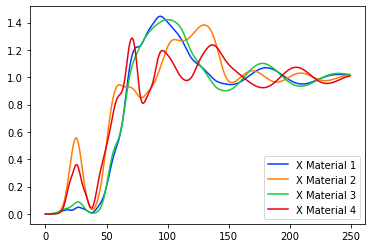

In [2]:
true_specs = np.genfromtxt(os.path.join(os.path.dirname(mcr_const.__file__), "..", "data", "true_4_specs.csv"))

plt.figure()
sns.set_palette('bright', true_specs.shape[0])
for i, spec in enumerate(true_specs):
    plt.plot(spec, label=f'X Material {i+1}')
plt.legend()

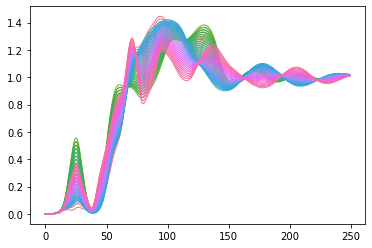

In [3]:
spectra_sequence = np.genfromtxt(os.path.join(os.path.dirname(mcr_const.__file__), "..", "data", "spectra_4_sequence.csv"))

plt.figure()
sns.set_palette('husl', spectra_sequence.shape[0])
for spec in spectra_sequence:
    plt.plot(spec, lw=1.0)

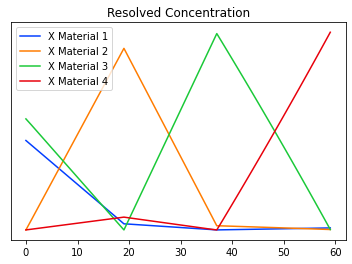

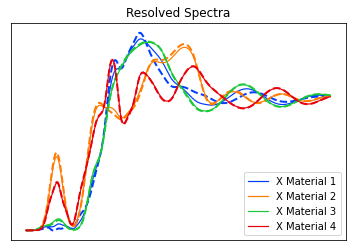

In [4]:
from pymcr.mcr import McrAR
from pymcr.regressors import NNLS
from pymcr.constraints import ConstraintNorm

mcrar = McrAR(c_regr=NNLS(), st_regr=NNLS(), c_constraints=[ConstraintNorm()])
spec_guess = spectra_sequence[[5, 20, 40, -3]]
mcrar.fit(spectra_sequence, ST=spec_guess)
resolved_conc = mcrar.C_opt_
resolved_spec = mcrar.ST_opt_


plt.figure()
sns.set_palette('bright', resolved_conc.shape[0])
for i, conc in enumerate(resolved_conc.T):
    plt.plot(conc, label=f'X Material {i+1}')
plt.legend()
plt.yticks([])
title = "Resolved Concentration"
plt.title(title)
plt.savefig(f'{title}.pdf', dpi=300)

plt.figure()
colors = sns.color_palette('bright', true_specs.shape[0])
for i, (tspec, rspec, color) in enumerate(zip(true_specs, resolved_spec, colors)):
    plt.plot(tspec, c=color, lw=1.2, label=f'X Material {i+1}') # True Spectra
    plt.plot(rspec, "--", lw=2.0, c=color) # Resolved spectra
plt.legend()
plt.xticks([])
plt.yticks([])
title = "Resolved Spectra"
plt.title(title)
plt.savefig(f'{title}.pdf', dpi=300)

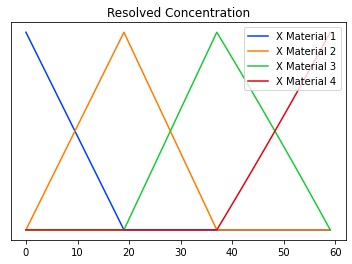

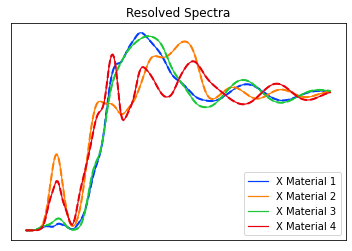

In [5]:
from pymcr.mcr import McrAR
from pymcr.regressors import NNLS
from pymcr.constraints import ConstraintNorm
from mcr_const.constraints.nist import ConstraintPointBelow

rank_selectivity = ConstraintPointBelow.from_phase_law(
    n_species=4,
    sequence_length=spectra_sequence.shape[0],
    interface_positions=[19, 37],
    threshold=1.0E-5
)

mcrar = McrAR(c_regr=NNLS(), st_regr=NNLS(),  c_constraints=[ConstraintNorm(), rank_selectivity])
spec_guess = spectra_sequence[[5, 20, 40, -3]]
mcrar.fit(spectra_sequence, ST=spec_guess)
resolved_conc = mcrar.C_opt_
resolved_spec = mcrar.ST_opt_


plt.figure()
sns.set_palette('bright', resolved_conc.shape[0])
for i, conc in enumerate(resolved_conc.T):
    plt.plot(conc, label=f'X Material {i+1}')
plt.legend()
plt.yticks([])
title = "Resolved Concentration"
plt.title(title)
plt.savefig(f'{title}.pdf', dpi=300)


plt.figure()
colors = sns.color_palette('bright', true_specs.shape[0])
for i, (tspec, rspec, color) in enumerate(zip(true_specs, resolved_spec, colors)):
    plt.plot(tspec, c=color, lw=1.2, label=f'X Material {i+1}') # True Spectra
    plt.plot(rspec, "--", c=color, lw=2.0) # Resolved spectra
plt.legend()
plt.xticks([])
plt.yticks([])
title = "Resolved Spectra"
plt.title(title)
plt.savefig(f'{title}.pdf', dpi=300)